# 📊 Fundamentos de métricas y evaluación de usuarios
Sesión 1 - Ciencia de Datos y Producto

In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
sns.set(style="whitegrid", palette="pastel")


### 🎯 Objetivo de la sesión
Comprender las métricas clave para evaluar el desempeño del negocio y el comportamiento de los usuarios en productos digitales, y aplicarlas en un ejemplo práctico.


### 1️⃣ Facturación, beneficios y rentabilidad

📘 **Concepto:**  
Métricas financieras que permiten entender la salud económica de un producto o servicio.

💡 **Intuición:**  
¿Estamos ganando dinero? ¿En qué etapa lo ganamos o lo perdemos?

🛠️ **Aplicaciones:**  
Análisis de costos, estrategias de precios y control de márgenes.

### 2️⃣ ROI y ROMI

📘 **Concepto:**  
- ROI = (Beneficio neto − Inversión) / Inversión  
- ROMI = Beneficio bruto generado por campaña / Gasto de campaña

💡 **Intuición:**  
¿Valió la pena la inversión? ¿Cuánto recuperamos por cada peso invertido?

🛠️ **Aplicaciones:**  
Comparación de campañas, canales o productos.

### 3️⃣ Embudos de conversión

📘 **Concepto:**  
Representan las etapas por las que pasa un usuario hasta completar una acción.

💡 **Ejemplo:**  
1000 impresiones → 100 clics → 10 conversiones

🛠️ **Aplicaciones:**  
Diagnóstico de pérdida de usuarios en cada etapa.

### 4️⃣ CTR y CR

📘 **Concepto:**  
- CTR = clics / impresiones * 100  
- CR = conversiones / clics * 100

💡 **Intuición:**  
CTR mide atención; CR mide convencimiento.

🛠️ **Aplicaciones:**  
Evaluación de campañas y páginas de destino.

### 5️⃣ DAU, WAU, MAU

📘 **Concepto:**  
Usuarios activos únicos por día, semana o mes.

💡 **Intuición:**  
Reflejan frecuencia de uso.

🛠️ **Aplicaciones:**  
Evaluar engagement o crecimiento.

### 6️⃣ Sticky Factor

📘 **Concepto:**  
Sticky Factor = DAU / WAU

💡 **Intuición:**  
¿Qué proporción de usuarios regresa cada día?

🛠️ **Aplicaciones:**  
Medición de retención a corto plazo.

### 7️⃣ Duración y frecuencia de sesiones

📘 **Concepto:**  
- ASL: duración promedio de sesión  
- Número de sesiones por usuario

💡 **Intuición:**  
Cuánto tiempo y cuán frecuente usan el producto.

🛠️ **Aplicaciones:**  
Diagnóstico de profundidad de uso.

### 8️⃣ Framework HEART

📘 **Concepto:**  
Evaluación UX: Happiness, Engagement, Adoption, Retention, Task Success

💡 **Intuición:**  
¿Es útil, agradable y efectivo?

🛠️ **Aplicaciones:**  
Medición de experiencia de usuario.

### 9️⃣ Framework AARRR

📘 **Concepto:**  
Ciclo de vida del usuario: Acquisition, Activation, Retention, Referral, Revenue

💡 **Intuición:**  
Detecta cuellos de botella en crecimiento.

🛠️ **Aplicaciones:**  
Diseño de estrategias de producto.

# Ejercicios prácticos

In [38]:
import pandas as pd


### 🧪 Análisis de  campañas 

#### Carga de datos y exploración

In [93]:
visits =pd.read_csv("https://raw.githubusercontent.com/zyntonyson/bootcamp_ds_da/refs/heads/main/datasets/visits.csv")


In [62]:
orders =pd.read_csv("https://raw.githubusercontent.com/zyntonyson/bootcamp_ds_da/refs/heads/main/datasets/orders.csv")


In [44]:
campaigns_details =pd.read_csv("https://raw.githubusercontent.com/zyntonyson/bootcamp_ds_da/refs/heads/main/datasets/campaigns_details.csv")

In [45]:
print(orders.info())
print(campaigns_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86017 entries, 0 to 86016
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   uuid_interaction  86017 non-null  object
 1   transaction_ts    86017 non-null  object
 2   items             86017 non-null  int64 
 3   amount            86017 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_campaña                     6 non-null      int64  
 1   costo_base_campaña             6 non-null      float64
 2   costo_por_dia_activo_campaña   6 non-null      float64
 3   costo_por_interaccion_campaña  6 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 324.0 bytes
None


#### `Visits` EDA e ingenieria de características

In [95]:
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400263 entries, 0 to 400262
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   uuid_user         400263 non-null  object
 1   ts_visits         400263 non-null  object
 2   campaign          400263 non-null  int64 
 3   uuid_interaction  400263 non-null  object
 4   convertion        400263 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 15.3+ MB


In [96]:
visits.head()

,uuid_user,ts_visits,campaign,uuid_interaction,convertion
0,c8217a67-705e-5176-8575-c5e701a75832,2025-05-29 13:59:07.034402,6,546d77ad-bb6b-57aa-87d9-956ab5dea217,0
1,ffbe64a4-dbba-58b8-a95c-1dddc95c971b,2025-05-07 11:29:06.034402,3,b90e348b-af69-5338-9ab0-00c1b47aa6fb,0
2,ffbe64a4-dbba-58b8-a95c-1dddc95c971b,2025-05-11 22:29:16.034402,4,be40765f-242b-5ea2-a741-bf4e07462678,0
3,33886b5e-cbf8-5eaa-bd3a-ea2799fc2dd7,2025-06-11 13:59:58.034402,4,7476855a-928a-5ce3-bb76-106b57bc0058,0
4,ffbe64a4-dbba-58b8-a95c-1dddc95c971b,2025-05-16 07:20:44.034402,4,73034530-5258-5eab-999b-62158894f119,0


In [97]:
visits.describe(include='all')

,uuid_user,ts_visits,campaign,uuid_interaction,convertion
count,400263,400263,400263.000000,400263,400263.000000
unique,50000,378146,NaN,400263,NaN
top,94033d3e-c6ee-5db3-9a35-5cf8f041711c,2025-05-25 21:21:30.034402,NaN,546d77ad-bb6b-57aa-87d9-956ab5dea217,NaN
freq,21,4,NaN,1,NaN
mean,NaN,NaN,3.890804,NaN,0.214901
std,NaN,NaN,1.506952,NaN,0.410754
min,NaN,NaN,1.000000,NaN,0.000000
25%,NaN,NaN,3.000000,NaN,0.000000
50%,NaN,NaN,4.000000,NaN,0.000000
75%,NaN,NaN,5.000000,NaN,0.000000


In [100]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

visits_enrichment=(
    visits
        .assign(
            ts_visits = lambda df: pd.to_datetime(df.ts_visits) ,
            date_visits = lambda df: df.ts_visits.dt.date,
            dow_id = lambda df: df.ts_visits.dt.day_name() ,
            dow = lambda df: pd.Categorical(df.dow_id,categories=ordered_days,ordered=True)

        )
)

In [101]:
print( f"Users : {visits_enrichment.uuid_user.nunique()}")
print( f"Visits : {visits_enrichment.uuid_interaction.nunique()}")
print( f"Start : {visits_enrichment.ts_visits.min()}")
print( f"End : {visits_enrichment.ts_visits.max()}")

Users : 50000
Visits : 400263
Start : 2025-05-05 22:55:10.034402
End : 2025-06-14 22:54:43.034402


* **Muestra  visitas y usuarios únicos por fecha**

In [102]:
df=(
    visits_enrichment
        .groupby(['date_visits'],as_index=False)
        .agg(
            visitas = ('uuid_interaction','nunique'),
            usuarios_unicos = ('uuid_user','nunique'),
        )
        .sort_values(by='date_visits')
)
df.head()

,date_visits,visitas,usuarios_unicos
0,2025-05-05,466,464
1,2025-05-06,9997,9036
2,2025-05-07,9959,9068
3,2025-05-08,9997,9065
4,2025-05-09,10154,9215


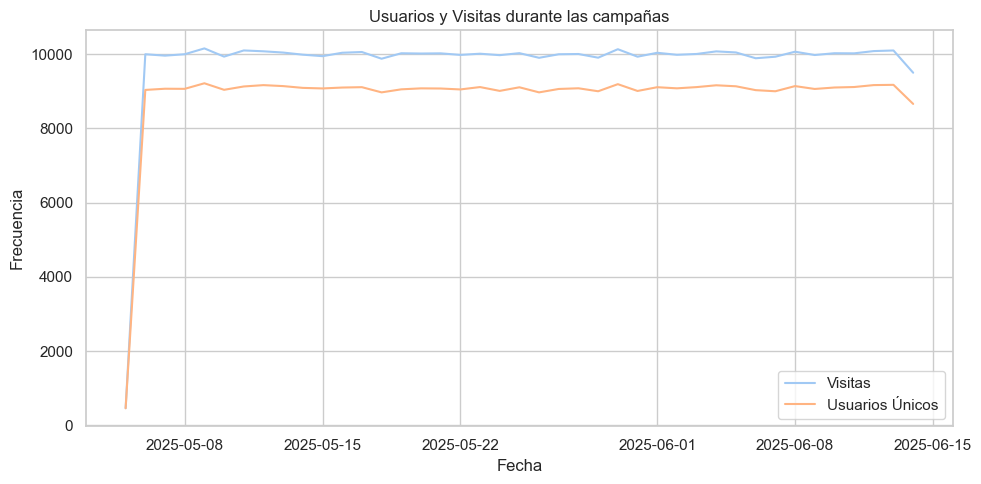

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='date_visits', y='visitas', label='Visitas')
sns.lineplot(data=df, x='date_visits', y='usuarios_unicos', label='Usuarios Únicos')

plt.title("Usuarios y Visitas durante las campañas")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

* **Muestra la conversión diaria por campaña** 

In [103]:
(
    visits_enrichment
        .groupby(['campaign'],as_index=False)
        .agg(
            visitas = ('uuid_interaction','nunique'),
            convertions = ('convertion','sum'),
        )
        .assign(
            rate_convertion_daily = lambda df: (df.convertions/df.visitas).round(3)
        )
        .sort_values(by='rate_convertion_daily',ascending=False)
)

,campaign,visitas,convertions,rate_convertion_daily
3,4,113425,32025,0.282
2,3,95459,22938,0.240
5,6,95565,22961,0.240
1,2,43396,4676,0.108
4,5,26167,1726,0.066
0,1,26251,1691,0.064


In [104]:
df=(
    visits_enrichment
        .groupby(['date_visits','campaign'],as_index=False)
        .agg(
            visitas = ('uuid_interaction','nunique'),
            convertions = ('convertion','sum'),
        )
        .assign(
            rate_convertion_daily = lambda df: (df.convertions/df.visitas).round(3)
        )
        .sort_values(by='date_visits')
)
df.head()

,date_visits,campaign,visitas,convertions,rate_convertion_daily
0,2025-05-05,1,32,0,0.000
1,2025-05-05,2,44,2,0.045
2,2025-05-05,3,122,28,0.230
3,2025-05-05,4,133,40,0.301
4,2025-05-05,5,35,3,0.086


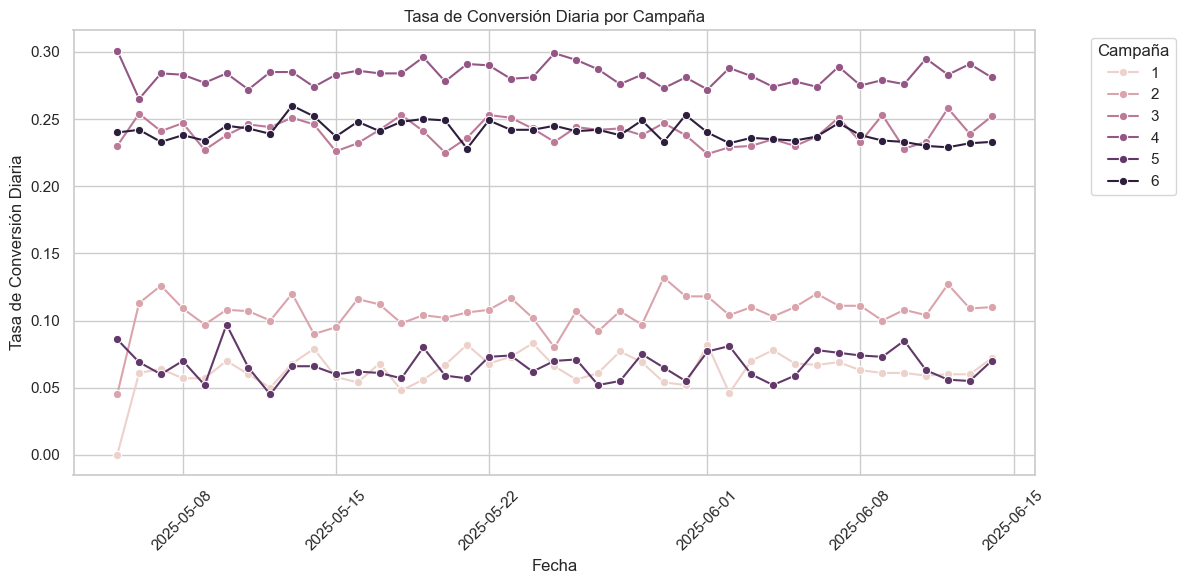

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date_visits', y='rate_convertion_daily', hue='campaign', marker='o')

plt.title("Tasa de Conversión Diaria por Campaña")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Conversión Diaria")
plt.legend(title="Campaña", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### `Orders` EDA e ingenieria de características

In [48]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86017 entries, 0 to 86016
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   uuid_interaction  86017 non-null  object
 1   transaction_ts    86017 non-null  object
 2   items             86017 non-null  int64 
 3   amount            86017 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


In [46]:
orders.head()

,uuid_interaction,transaction_ts,items,amount
0,af174f1b-43c0-5a1d-ac24-4391b57eeccf,2025-05-23 06:06:32.034402,7,2593
1,cc6c384e-86c5-5dba-8afd-04390658994a,2025-05-19 17:36:59.034402,8,1118
2,d85c5e59-f957-5277-a317-81c26bfaa84b,2025-05-11 23:51:47.034402,7,2535
3,9e1c541b-3503-5807-8978-5577b2b3498a,2025-05-11 13:43:10.034402,6,2515
4,f0f90088-b8ed-5ad8-9ffe-ebd1a14a7d96,2025-05-31 20:04:21.034402,9,296


In [76]:
orders_enrichment=(
   orders
    .merge(visits[['uuid_interaction','ts_visits','campaign','uuid_user']],how='inner')
    .assign(
        transaction_ts = lambda df: pd.to_datetime(df.transaction_ts),
        ts_visits = lambda df: pd.to_datetime(df.ts_visits),
        days_elapsed_until_convertion= lambda df: (df.transaction_ts - df.ts_visits).dt.days

    )
)

orders_enrichment

,uuid_interaction,transaction_ts,items,amount,ts_visits,campaign,uuid_user,days_elapsed_until_convertion
0,af174f1b-43c0-5a1d-ac24-4391b57eeccf,2025-05-23 06:06:32.034402,7,2593,2025-05-13 08:54:21.034402,4,ffbe64a4-dbba-58b8-a95c-1dddc95c971b,9
1,cc6c384e-86c5-5dba-8afd-04390658994a,2025-05-19 17:36:59.034402,8,1118,2025-05-16 03:25:47.034402,3,d35a2a2a-d1d1-55ed-90a7-348c3da59deb,3
2,d85c5e59-f957-5277-a317-81c26bfaa84b,2025-05-11 23:51:47.034402,7,2535,2025-05-10 18:10:24.034402,4,1e5f1a27-4c4e-5b84-b4dd-5227b40c755d,1
3,9e1c541b-3503-5807-8978-5577b2b3498a,2025-05-11 13:43:10.034402,6,2515,2025-05-06 07:42:34.034402,6,dbc080c1-f33d-5a36-8bd2-68fb0d20f0db,5
4,f0f90088-b8ed-5ad8-9ffe-ebd1a14a7d96,2025-05-31 20:04:21.034402,9,296,2025-05-23 06:23:47.034402,4,dbc080c1-f33d-5a36-8bd2-68fb0d20f0db,8
...,...,...,...,...,...,...,...,...
86012,a5f74f58-e425-5303-a221-b22963cd9f96,2025-06-06 15:03:37.034402,4,1996,2025-05-30 13:52:13.034402,6,bad559ae-8d30-59cc-89b6-8a691f5d8022,7
86013,470f6b60-1a08-5cc0-b099-60b7d1efd451,2025-05-20 11:49:01.034402,12,3143,2025-05-17 00:57:24.034402,3,c8217a67-705e-5176-8575-c5e701a75832,3
86014,1961fd1f-02e9-52bc-8aab-6926ff401e2d,2025-05-28 21:24:33.034402,4,1196,2025-05-26 07:32:02.034402,3,c8217a67-705e-5176-8575-c5e701a75832,2
86015,92f63b03-2006-5b93-903c-fde718c229d5,2025-06-04 06:32:28.034402,2,598,2025-05-27 10:45:01.034402,4,c8217a67-705e-5176-8575-c5e701a75832,7


In [75]:
orders_enrichment.describe()

,transaction_ts,items,amount,ts_visits,campaign,days_elapsed_until_convertion
count,86017,86017.000000,86017.000000,86017,86017.000000,86017.000000
mean,2025-05-30 21:53:37.633132544,8.989583,1734.029924,2025-05-25 22:09:21.896661760,4.119569,4.488124
min,2025-05-06 02:51:35.034402,1.000000,20.000000,2025-05-05 22:55:20.034402,1.000000,0.000000
25%,2025-05-20 22:10:40.034402048,5.000000,544.000000,2025-05-15 23:14:28.034402048,3.000000,2.000000
50%,2025-05-30 20:06:12.034402048,9.000000,1493.000000,2025-05-25 20:36:49.034402048,4.000000,4.000000
75%,2025-06-09 21:20:03.034402048,13.000000,2588.000000,2025-06-04 22:19:23.034402048,6.000000,7.000000
max,2025-06-24 21:52:27.034402,25.000000,10479.000000,2025-06-14 22:54:43.034402,6.000000,9.000000
std,NaN,4.903513,1410.050113,NaN,1.317033,2.869147


**Muestra los ingresos diarios por campaña** 

In [90]:
df=(
    orders_enrichment
        .assign(
            transaction_date = lambda df: df.transaction_ts.dt.date
        )
        .groupby(['transaction_date','campaign'],as_index=False)
        .agg(
            users_converted = ('uuid_user','nunique'),
            convertions = ('uuid_interaction','nunique'),
            revenue = ('amount','sum')
        )
        .assign(
            k_revenue = lambda df: df.revenue/1000
        )
        
)
df.head()

,transaction_date,campaign,users_converted,convertions,revenue,k_revenue
0,2025-05-06,1,1,1,1435,1.435
1,2025-05-06,2,7,7,9686,9.686
2,2025-05-06,3,36,36,60680,60.680
3,2025-05-06,4,41,41,65469,65.469
4,2025-05-06,5,2,2,2856,2.856


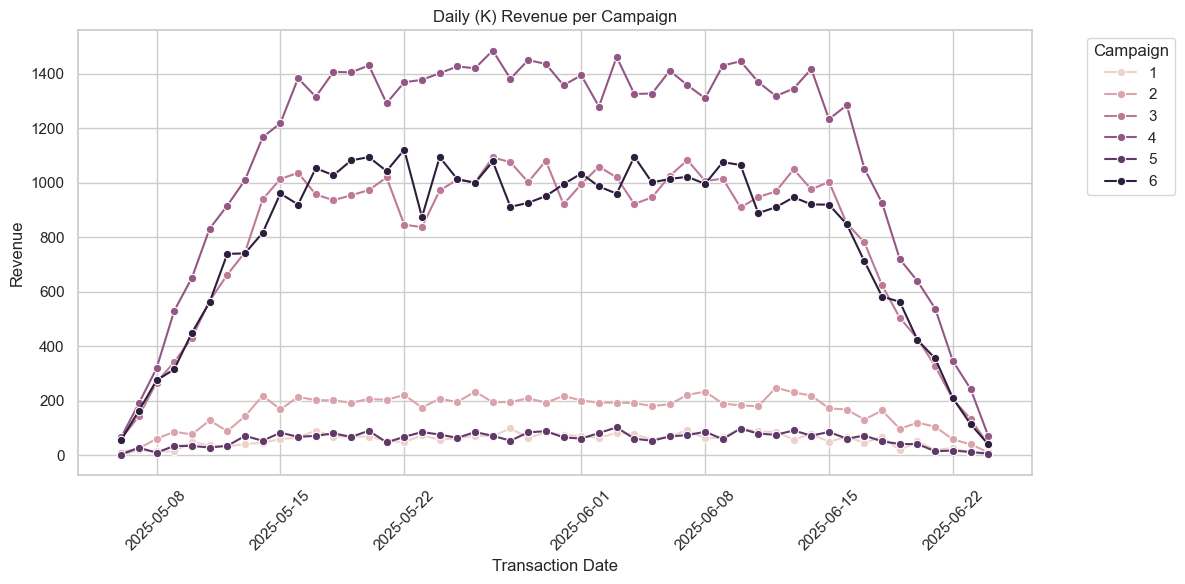

In [92]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='transaction_date', y='k_revenue', hue='campaign', marker='o')

# Etiquetas
plt.title("Daily (K) Revenue per Campaign")
plt.xlabel("Transaction Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend(title="Campaign", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Por campaña muestra la cantidad de interacciones, conversiones, ingresos generados, tiempo promedio de conversión**

In [126]:
visits_summary=(
    visits_enrichment
        .groupby(['campaign'],as_index=False)
        .agg(
            visitas = ('uuid_interaction','nunique'),
            convertions = ('convertion','sum'),
            start_campaign =('ts_visits','min'),
            end_campaign =('ts_visits','max'),
        )
        .assign(
            rate_convertion = lambda df: (df.convertions/df.visitas).round(3),
            campaigns_days_duration = lambda df: (df.end_campaign-df.start_campaign).dt.days
        )
        .sort_values(by='rate_convertion',ascending=False)
)
visits_summary

,campaign,visitas,convertions,start_campaign,end_campaign,rate_convertion,campaigns_days_duration
3,4,113425,32025,2025-05-05 22:55:20.034402,2025-06-14 22:54:22.034402,0.282,39
2,3,95459,22938,2025-05-05 22:55:10.034402,2025-06-14 22:54:43.034402,0.240,39
5,6,95565,22961,2025-05-05 22:55:23.034402,2025-06-14 22:52:49.034402,0.240,39
1,2,43396,4676,2025-05-05 22:56:31.034402,2025-06-14 22:54:05.034402,0.108,39
4,5,26167,1726,2025-05-05 22:55:39.034402,2025-06-14 22:54:30.034402,0.066,39
0,1,26251,1691,2025-05-05 22:58:18.034402,2025-06-14 22:52:22.034402,0.064,39


In [122]:
orders_summary=(
    orders_enrichment
        .assign(
            transaction_date = lambda df: df.transaction_ts.dt.date
        )
        .groupby(['campaign'],as_index=False)
        .agg(
            users_converted = ('uuid_user','nunique'),
            convertions_interact = ('uuid_interaction','nunique'),
            revenue = ('amount','sum'),
            time_convertion_avg=('days_elapsed_until_convertion','mean')
        )
        .assign(
            k_revenue = lambda df: df.revenue/1000
        )
        
)
orders_summary

,campaign,users_converted,convertions_interact,revenue,time_convertion_avg,k_revenue
0,1,1674,1691,2842345,4.545240,2842.345
1,2,4476,4676,8186761,4.497006,8186.761
2,3,18400,22938,39700716,4.463249,39700.716
3,4,23722,32025,55476726,4.504325,55476.726
4,5,1694,1726,3010738,4.464658,3010.738
5,6,18415,22961,39938766,4.486129,39938.766


In [132]:
campaigns_results=(visits_summary[['campaign','visitas','rate_convertion','campaigns_days_duration']]
    .merge(orders_summary[['campaign','revenue','time_convertion_avg']],how='inner',on='campaign')
) 
campaigns_results

,campaign,visitas,rate_convertion,campaigns_days_duration,revenue,time_convertion_avg
0,4,113425,0.282,39,55476726,4.504325
1,3,95459,0.240,39,39700716,4.463249
2,6,95565,0.240,39,39938766,4.486129
3,2,43396,0.108,39,8186761,4.497006
4,5,26167,0.066,39,3010738,4.464658
5,1,26251,0.064,39,2842345,4.545240


In [133]:
campaigns_results=(
    campaigns_results
        .assign(
            rate_revenue_interaction= lambda df: (df.revenue/df.visitas).round(3),
            rate_revenue_convertion= lambda df: (df.revenue/(df.visitas*df.rate_convertion)).round(3),
        )
)

campaigns_results

,campaign,visitas,rate_convertion,campaigns_days_duration,revenue,time_convertion_avg,rate_revenue_interaction,rate_revenue_convertion
0,4,113425,0.282,39,55476726,4.504325,489.105,1734.415
1,3,95459,0.240,39,39700716,4.463249,415.893,1732.887
2,6,95565,0.240,39,39938766,4.486129,417.923,1741.344
3,2,43396,0.108,39,8186761,4.497006,188.652,1746.782
4,5,26167,0.066,39,3010738,4.464658,115.059,1743.312
5,1,26251,0.064,39,2842345,4.545240,108.276,1691.808


**Muestra el ROMI por campaña**

In [134]:
campaigns_details.head()

,id_campaña,costo_base_campaña,costo_por_dia_activo_campaña,costo_por_interaccion_campaña
0,1,9042.075219,3.444397,0.870244
1,2,8972.359744,5.327826,0.596361
2,3,9221.218884,0.051849,0.585597
3,4,9192.968457,13.987079,0.769700
4,5,8977.338089,0.863677,1.173937


In [139]:
def get_romi(row):
    # Costos individuales
    base = row['costo_base_campaña']
    costo_dias = row['costo_por_dia_activo_campaña'] * row['campaigns_days_duration']
    costo_interacciones = row['costo_por_interaccion_campaña'] * row['visitas']
    
    # Costo total
    costo_total = base + costo_dias + costo_interacciones
    
    # Ingreso
    revenue = row['revenue']
    
    # ROMI
    if costo_total == 0:
        return float('nan')  # Venta organica
    return (revenue - costo_total) / costo_total

In [142]:
(
    campaigns_details
        .rename(columns={'id_campaña':'campaign'})
        .merge(campaigns_results[['visitas','campaigns_days_duration','revenue','campaign']],how='inner',on='campaign')
        .assign(
            ROMI= lambda df: df.apply(get_romi,axis=1)
        )
        .sort_values('ROMI',ascending=False)
)

,campaign,costo_base_campaña,costo_por_dia_activo_campaña,costo_por_interaccion_campaña,visitas,campaigns_days_duration,revenue,ROMI
2,3,9221.218884,0.051849,0.585597,95459,39,39700716,608.619819
3,4,9192.968457,13.987079,0.769700,113425,39,55476726,570.679643
5,6,9033.001774,2.403560,0.796463,95565,39,39938766,467.540789
1,2,8972.359744,5.327826,0.596361,43396,39,8186761,232.508408
0,1,9042.075219,3.444397,0.870244,26251,39,2842345,87.764535
4,5,8977.338089,0.863677,1.173937,26167,39,3010738,74.781035


### 📈 Cálculo de CTR y CR por campaña

In [ ]:
# Agrupamos y contamos eventos
pivot = df.pivot_table(index='campania', columns='evento', aggfunc='size', fill_value=0)
pivot["CTR"] = pivot["clic"] / pivot["impresion"]
pivot["CR"] = pivot["conversion"] / pivot["clic"]
pivot[["CTR", "CR"]] * 100  # en porcentaje


### ✅ Conclusión
Este ejercicio ilustra cómo se pueden usar métricas simples para entender el rendimiento de una campaña y el comportamiento de los usuarios. En la siguiente sesión exploraremos análisis más avanzados como cohortes y economía unitaria.